In [77]:
import pandas as pd
import seaborn as sns
import scipy.stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

The [Possum dataset](https://www.kaggle.com/datasets/abrambeyer/openintro-possum) comprises nine morphometric measurements for each of the 104 mountain brushtail possums captured at seven locations spanning from Southern Victoria to central Queensland.  

<img src="https://storage.googleapis.com/kaggle-datasets-images/1534513/2532158/c49c3c89019ed2251376ecfcf7a7eec0/dataset-cover.jpg?t=2021-08-17-01-33-40" width="200"/>


In [5]:
filename = '../data/possum.csv'

Read the dataset into a pandas dataframe named `possum_data`.

In [6]:
possum_data = pd.read_csv(filename)

In [14]:
possum_data.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

how many rows and columns the dataframe contains?

In [9]:
possum_data.shape

(104, 14)

Which columns contain null values? Provide a series containing only those columns along with their respective counts.

In [13]:
# Identify columns with null values and their respective counts
nulls_per_column= possum_data.isnull().sum()

# Filter columns with non-zero counts (indicating null values)
columns_with_null = nulls_per_column[nulls_per_column > 0]
columns_with_null

age         2
footlgth    1
dtype: int64

Remove the **rows** with missing values.

In [15]:
possum_data = possum_data.dropna()

Generate a new column named 'body_ratio' based on ratio between the head length ('hdlngth') and total size ('totlngth').

In [67]:
possum_data['body_ratio'] = possum_data['hdlngth']/possum_data['totlngth']

Is the body ratio correlated to age? is it correlated to belly size? report the Pearson coefficients and corresponding p-values.

In [88]:
pearson_r_age, pearson_pval_age = scipy.stats.pearsonr(possum_data['body_ratio'],possum_data['age'])
print(f"Age: r = {round(pearson_r_age,2)}, p-value = {round(pearson_pval_age,4)}")
pearson_r_belly, pearson_pval_belly = scipy.stats.pearsonr(possum_data['body_ratio'],possum_data['footlgth'])
print(f"Belly: r = {round(pearson_r_belly,2)}, p-value = {round(pearson_pval_belly,4)}")



Age: r = -0.02, p-value = 0.8778
Belly: r = -0.32, p-value = 0.0045


Use seaborn to generate a single histogram plot of the body ratio, showing the distribution for each sex separately. Experiment with varying the number of bins to observe its effect on the visualization. 
Setting kde=True to add a smooth line called a "kernel density estimate" (KDE) to the histogram bars. This line provides an approximation of the underlying probability density function of the data, helping visualize the distribution more smoothly.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


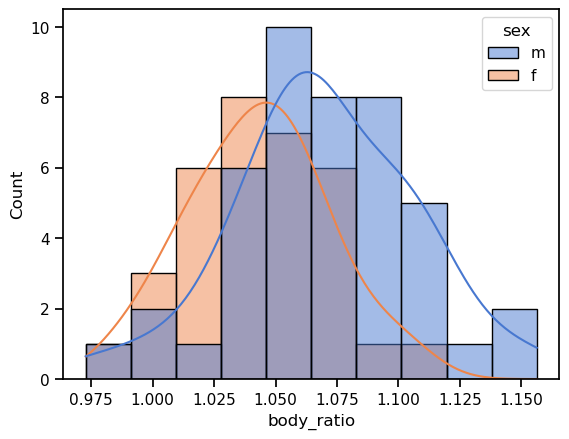

In [82]:
sns.histplot(data=possum_data, x='body_ratio', hue='sex', kde = True, bins = 10);

Use an appropriate statistical test to test the assumption that the mean of body ratio for males and females is equal. Import any necessary libraries.

In [89]:
male_head_lengths = possum_data[possum_data.sex=='m']['body_ratio'] 
female_head_lengths = possum_data[possum_data.sex=='f']['body_ratio'] 
scipy.stats.ttest_ind(male_head_lengths,female_head_lengths)

TtestResult(statistic=3.5255575853627814, pvalue=0.0007244447314884039, df=75.0)

How many sites are listed in the 'Site' column? How many rows are associated with each site?

In [20]:
site_counts = possum_data['site'].value_counts()
site_counts

site
1    33
7    18
5    13
6    13
2    10
3     7
4     7
Name: count, dtype: int64

Remove rows associated with sites that occur fewer than 10 times in the dataset.

In [25]:
large_site_counts = site_counts [site_counts  > 10]
large_site_counts
possum_data =possum_data[possum_data.site.isin(large_site_counts.index)]

Create a summary DataFrame that calculates the average body ratio for each site.

In [76]:
# Generate a summarized DataFrame
mean_hdlngth_per_site = possum_data.groupby('site')['body_ratio'].mean().reset_index()
mean_hdlngth_per_site

/var/folders/q8/rdgxsl4523v9jc40pjjzp9g40000gp/T/ipykernel_36527/1769324230.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_hdlngth_per_site = possum_data.groupby('site')['body_ratio'].mean().reset_index()


,site,body_ratio
0,1,1.045584
1,5,1.060515
2,6,1.056749
3,7,1.081662


Generate a boxplot showing the distribution of body ratio across different sites using Seaborn. Before creating the plot, check the data type of the 'site' column. You may need to convert it to a different type before generating the plot.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='site', ylabel='body_ratio'>

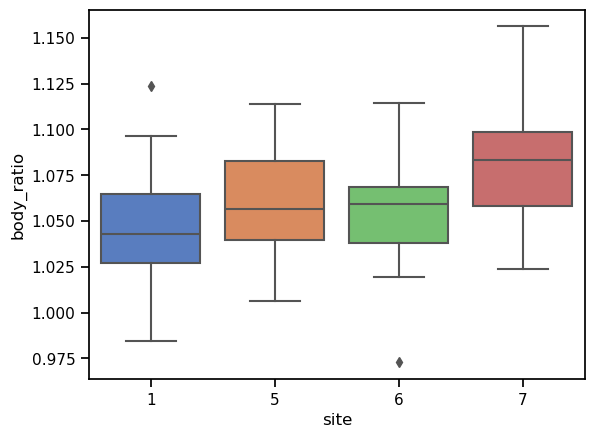

In [73]:
possum_data['site'] = possum_data['site'].astype('category')
sns.boxplot(x='site', y='body_ratio', data=possum_data)

Use an appropriate statistical test to determine if there's a significant difference in the mean body ratio across various sites. (Refer to the 'Statistics' notebook for more details.)

In [90]:
model = ols('body_ratio ~ C(site)', data=possum_data).fit()
aov_table = sm.stats.anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(site),3.0,0.015254,0.005085,4.512113,0.00585
Residual,73.0,0.082264,0.001127,NaN,NaN


We now want to explore the linear relationship between body ratio and foot length ('footlgth'), separately for each 'sex' category. Create a simple linear regression plot using Seaborn to visualize this relationship.

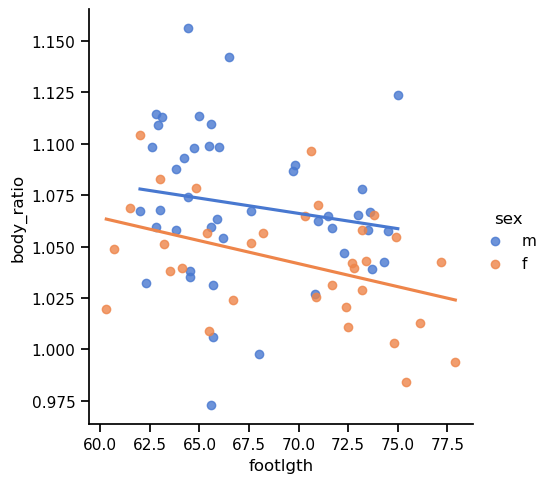

In [91]:
sns.lmplot(
    x='footlgth', 
    y='body_ratio', 
    hue='sex', 
    data=possum_data, 
    ci=False, 
);

To delve deeper into this relationship, construct a linear regression model with the body ratio as the dependent variable and foot length ('footlgth') and sex as the independent variables. Print the model summary and determine if sex and foot length are significant variables.

In [92]:
model = ols(formula="body_ratio ~ footlgth+C(sex)", data=possum_data).fit()
(model.summary()) #print a summary of model performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             body_ratio   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     9.293
Date:                Sat, 04 May 2024   Prob (F-statistic):           0.000251
Time:                        17:49:30   Log-Likelihood:                 156.22
No. Observations:                  77   AIC:                            -306.4
Df Residuals:                      74   BIC:                            -299.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1744      0.057     20.696      0.000       1.061       1.287
C(sex)[T.m]     0.0231      0.008      3.015      0.004       0.008       0.038
footlgth       -0.0019      0.001     -2.329      0.023      -0.004      -0.000
==============================================================================
Omnibus:                        2.756   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.252   Jarque-Bera (JB):                2.178
Skew:                          -0.199   Prob(JB):                        0.336
Kurtosis:                       3.721   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Generate a new model, now also including tail ('taill') and belly sizes. Did the R^2 value improve? Utilize an F-test to ascertain whether the addition of the new variables is statistically significant.

In [95]:
model_2 = ols(formula="body_ratio ~ footlgth+belly+taill+C(sex)", data=possum_data).fit()
print(model_2.summary()) #print a summary of model performance
F_statistic, p_value, df = (model_2.compare_f_test(model))
print(f"\nF statistic = {round(F_statistic,2)}, p-value= {round(p_value,2)}, degrees of freedom = {df}")

                            OLS Regression Results                            
Dep. Variable:             body_ratio   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     11.53
Date:                Sat, 04 May 2024   Prob (F-statistic):           2.75e-07
Time:                        17:51:24   Log-Likelihood:                 166.65
No. Observations:                  77   AIC:                            -323.3
Df Residuals:                      72   BIC:                            -311.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.5366      0.097     15.793      

### Last section
Perform three different statistical tests and create three diverse figures that you believe are both intriguing and useful for analysis.